In [159]:
import urllib2
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
raw_csv = urllib2.urlopen(path)
col_names = range(23)
df = pd.read_csv(raw_csv, names = col_names)

In [160]:
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [161]:
df[0]

0       p
1       e
2       e
3       p
4       e
5       e
6       e
7       e
8       p
9       e
10      e
11      e
12      e
13      p
14      e
15      e
16      e
17      p
18      p
19      p
20      e
21      p
22      e
23      e
24      e
25      p
26      e
27      e
28      e
29      e
       ..
8094    e
8095    p
8096    e
8097    p
8098    p
8099    e
8100    e
8101    p
8102    e
8103    e
8104    e
8105    e
8106    e
8107    e
8108    p
8109    e
8110    e
8111    e
8112    e
8113    p
8114    p
8115    e
8116    p
8117    p
8118    p
8119    e
8120    e
8121    e
8122    p
8123    e
Name: 0, dtype: object

In [156]:
df[i].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [158]:
df.shape[1]

23

In [7]:
temp_df = DataFrame([[1, 2], [1, 4], [5, 6], [5, 4], [5, 4]], columns=['A', 'B'])

In [8]:
temp_df


,A,B
0,1,2
1,1,4
2,5,6
3,5,4
4,5,4


In [9]:
groupby_temp_df = temp_df.groupby('A')

In [10]:
groupby_temp_df

In [11]:
groupby_temp_df.groups

{1: [0, 1], 5: [2, 3, 4]}

In [14]:
groupby_temp_df.get_group(5)

,A,B
2,5,6
3,5,4
4,5,4


In [23]:
groupby_temp_df.head?

In [29]:
a = df[[0,1]].groupby(1)

In [30]:
a

In [31]:
a.count()

,0
1,
b,452
c,4
f,3152
k,828
s,32
x,3656


In [33]:
a.head(1)

,0,1
0,p,x
2,e,b
15,e,s
16,e,f
4276,e,k
5126,p,c


In [34]:
a.get_group("s")

,0,1
15,e,s
36,e,s
60,e,s
89,e,s
111,e,s
116,e,s
119,e,s
142,e,s
153,e,s
181,e,s


In [35]:
a.describe()

0     1
1                   
b count    452   452
  unique     2     1
  top        e     b
  freq     404   452
c count      4     4
  unique     1     1
  top        p     c
  freq       4     4
f count   3152  3152
  unique     2     1
  top        e     f
  freq    1596  3152
k count    828   828
  unique     2     1
  top        p     k
  freq     600   828
s count     32    32
  unique     1     1
  top        e     s
  freq      32    32
x count   3656  3656
  unique     2     1
  top        e     x
  freq    1948  3656

In [59]:
df_per_attr = {}
for i in range(1, 23):
    df_per_attr[i] = {}
    groupby_df = df[[0, i]].groupby(i)
    df_per_attr[i]['ngorups'] = groupby_df.ngroups
    df_per_attr[i]['group_keys'] = groupby_df.groups.keys()
    df_per_attr[i]['subgroups'] = {}
    for j in range(groupby_df.ngroups):
        df_per_attr[i]['subgroups'][j] = groupby_df.get_group(df_per_attr[i]['group_keys'][j])

In [83]:
type(df_per_attr)

dict

In [85]:
df_per_attr[1]['subgroups'][4]

,0,1
15,e,s
36,e,s
60,e,s
89,e,s
111,e,s
116,e,s
119,e,s
142,e,s
153,e,s
181,e,s


In [60]:
groupby_df.ngroups

7

In [81]:
type(df[[0, 1]].groupby(1).ngroups)

int

In [79]:
type(df[[0, 1]].groupby(1).groups.keys())

list

In [77]:
df[[0, 1]].groupby(1).get_group('b')

,0,1
2,e,b
6,e,b
7,e,b
9,e,b
12,e,b
20,e,b
22,e,b
23,e,b
24,e,b
30,e,b


In [ ]:
df[[0, 1]].groupby(1).get_group('b')

In [62]:
df[[0, 1]].groupby(1)['group_keys'][3]

In [67]:
df_per_attr[1]

{'group_keys': ['c', 'b', 'f', 'k', 's', 'x'],
 'ngorups': 6,
 'subgroups': {0:       0  1
  5126  p  c
  5508  p  c
  7401  p  c
  7706  p  c, 1:       0  1
  2     e  b
  6     e  b
  7     e  b
  9     e  b
  12    e  b
  20    e  b
  22    e  b
  23    e  b
  24    e  b
  30    e  b
  34    e  b
  39    e  b
  40    e  b
  52    e  b
  55    e  b
  57    e  b
  61    e  b
  62    e  b
  63    e  b
  64    e  b
  71    e  b
  74    e  b
  86    e  b
  91    e  b
  98    e  b
  101   e  b
  104   e  b
  107   e  b
  108   e  b
  126   e  b
  ...  .. ..
  7912  e  b
  7913  e  b
  7937  e  b
  7939  e  b
  7954  e  b
  7960  e  b
  7966  e  b
  7972  e  b
  7974  e  b
  7975  e  b
  7976  e  b
  7986  e  b
  7988  e  b
  8000  e  b
  8009  e  b
  8013  e  b
  8017  e  b
  8019  e  b
  8035  e  b
  8040  e  b
  8046  e  b
  8055  e  b
  8056  e  b
  8067  e  b
  8074  e  b
  8076  e  b
  8078  e  b
  8084  e  b
  8094  e  b
  8109  e  b
  
  [452 rows x 2 columns], 2:       0  1
  16  

In [66]:
df_per_attr[1]['group_keys']

['c', 'b', 'f', 'k', 's', 'x']

In [63]:
df[[0, 1]].groupby(1).get_group(df_per_attr[1]['group_keys'][3])

,0,1
4276,e,k
4291,e,k
4331,p,k
4459,e,k
4814,p,k
4831,e,k
4834,e,k
4846,e,k
4858,e,k
4926,e,k


In [50]:
df_per_attr

{1: {'group_keys': ['c', 'b', 'f', 'k', 's', 'x'],
  'ngorups': 6,
  'subgroups': {0:       0  1
   5126  p  c
   5508  p  c
   7401  p  c
   7706  p  c, 1:       0  1
   2     e  b
   6     e  b
   7     e  b
   9     e  b
   12    e  b
   20    e  b
   22    e  b
   23    e  b
   24    e  b
   30    e  b
   34    e  b
   39    e  b
   40    e  b
   52    e  b
   55    e  b
   57    e  b
   61    e  b
   62    e  b
   63    e  b
   64    e  b
   71    e  b
   74    e  b
   86    e  b
   91    e  b
   98    e  b
   101   e  b
   104   e  b
   107   e  b
   108   e  b
   126   e  b
   ...  .. ..
   7912  e  b
   7913  e  b
   7937  e  b
   7939  e  b
   7954  e  b
   7960  e  b
   7966  e  b
   7972  e  b
   7974  e  b
   7975  e  b
   7976  e  b
   7986  e  b
   7988  e  b
   8000  e  b
   8009  e  b
   8013  e  b
   8017  e  b
   8019  e  b
   8035  e  b
   8040  e  b
   8046  e  b
   8055  e  b
   8056  e  b
   8067  e  b
   8074  e  b
   8076  e  b
   8078  e  b
   8084  e  b
   809

In [51]:
df_per_attr[1]['subgroups']

{0:       0  1
 5126  p  c
 5508  p  c
 7401  p  c
 7706  p  c, 1:       0  1
 2     e  b
 6     e  b
 7     e  b
 9     e  b
 12    e  b
 20    e  b
 22    e  b
 23    e  b
 24    e  b
 30    e  b
 34    e  b
 39    e  b
 40    e  b
 52    e  b
 55    e  b
 57    e  b
 61    e  b
 62    e  b
 63    e  b
 64    e  b
 71    e  b
 74    e  b
 86    e  b
 91    e  b
 98    e  b
 101   e  b
 104   e  b
 107   e  b
 108   e  b
 126   e  b
 ...  .. ..
 7912  e  b
 7913  e  b
 7937  e  b
 7939  e  b
 7954  e  b
 7960  e  b
 7966  e  b
 7972  e  b
 7974  e  b
 7975  e  b
 7976  e  b
 7986  e  b
 7988  e  b
 8000  e  b
 8009  e  b
 8013  e  b
 8017  e  b
 8019  e  b
 8035  e  b
 8040  e  b
 8046  e  b
 8055  e  b
 8056  e  b
 8067  e  b
 8074  e  b
 8076  e  b
 8078  e  b
 8084  e  b
 8094  e  b
 8109  e  b
 
 [452 rows x 2 columns], 2:       0  1
 16    e  f
 25    p  f
 28    e  f
 49    e  f
 56    e  f
 65    e  f
 67    e  f
 70    e  f
 72    e  f
 75    e  f
 77    e  f
 79    e  f
 82  

In [87]:
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [90]:
df[0].map?

In [98]:
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [112]:
unique_array=df[0].unique()

In [114]:
unique_array[0]

'p'

In [113]:
map_dic[0]={}

In [117]:
map_dic[0][unique_array[0]]=0

In [119]:
map_dic[0][unique_array[1]]=1

In [120]:
map_dic

{0: {'e': 1, 'p': 0}}

In [126]:
df[df[0] ==0].describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
unique,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
num_columns = df.shape[1]
map_dic = {}
for i in range(num_columns):
    unique_array = df[i].unique()
    N = len(unique_array)
    map_dic[i] = {}
    for j in range(N):
        map_dic[i][unique_array[j]] = j
    df[i] = df[i].map(map_dic[i])    
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1
5,1,0,1,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
6,1,1,0,2,0,1,0,0,1,2,...,0,0,0,0,0,0,0,0,1,2
7,1,1,1,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,0,2
8,0,0,1,2,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,3,1
9,1,1,0,1,0,1,0,0,1,2,...,0,0,0,0,0,0,0,0,0,2


In [129]:
for i in range(1, num_columns):
    unique_array = df[i].unique()
    N = len(unique_array)
    map_dic_sub = {}
    for j in range(N):
        if j == 0:
            map_dic_sub[j] = 0
        else:
            map_dic_sub[j] = j / float(N - 1)
    df[i] = df[i].map(map_dic_sub)
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,0.0,0.000000,0.000000,0,0.000,0,0,0,0.000000,...,0.000000,0.000,0.000,0,0.000000,0.0,0.00,0.000,0.0,0.000000
1,1,0.0,0.000000,0.111111,0,0.125,0,0,1,0.000000,...,0.000000,0.000,0.000,0,0.000000,0.0,0.00,0.125,0.2,0.166667
2,1,0.2,0.000000,0.222222,0,0.250,0,0,1,0.090909,...,0.000000,0.000,0.000,0,0.000000,0.0,0.00,0.125,0.2,0.333333
3,0,0.0,0.333333,0.222222,0,0.000,0,0,0,0.090909,...,0.000000,0.000,0.000,0,0.000000,0.0,0.00,0.000,0.0,0.000000
4,1,0.0,0.000000,0.333333,1,0.375,0,1,1,0.000000,...,0.000000,0.000,0.000,0,0.000000,0.0,0.25,0.125,0.4,0.166667
5,1,0.0,0.333333,0.111111,0,0.125,0,0,1,0.090909,...,0.000000,0.000,0.000,0,0.000000,0.0,0.00,0.000,0.2,0.166667
6,1,0.2,0.000000,0.222222,0,0.125,0,0,1,0.181818,...,0.000000,0.000,0.000,0,0.000000,0.0,0.00,0.000,0.2,0.333333
7,1,0.2,0.333333,0.222222,0,0.250,0,0,1,0.090909,...,0.000000,0.000,0.000,0,0.000000,0.0,0.00,0.125,0.0,0.333333
8,0,0.0,0.333333,0.222222,0,0.000,0,0,0,0.272727,...,0.000000,0.000,0.000,0,0.000000,0.0,0.00,0.000,0.6,0.166667
9,1,0.2,0.000000,0.111111,0,0.125,0,0,1,0.181818,...,0.000000,0.000,0.000,0,0.000000,0.0,0.00,0.000,0.0,0.333333


In [132]:
df[0]==0

0        True
1       False
2       False
3        True
4       False
5       False
6       False
7       False
8        True
9       False
10      False
11      False
12      False
13       True
14      False
15      False
16      False
17       True
18       True
19       True
20      False
21       True
22      False
23      False
24      False
25       True
26      False
27      False
28      False
29      False
        ...  
8094    False
8095     True
8096    False
8097     True
8098     True
8099    False
8100    False
8101     True
8102    False
8103    False
8104    False
8105    False
8106    False
8107    False
8108     True
8109    False
8110    False
8111    False
8112    False
8113     True
8114     True
8115    False
8116     True
8117     True
8118     True
8119    False
8120    False
8121    False
8122     True
8123    False
Name: 0, dtype: bool

In [131]:
df[df[0]==0]

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,0.0,0.000000,0.000000,0,0.000,0,0,0,0.000000,...,0.000000,0.000,0.000,0,0,0,0.00,0.000,0.0,0.000000
3,0,0.0,0.333333,0.222222,0,0.000,0,0,0,0.090909,...,0.000000,0.000,0.000,0,0,0,0.00,0.000,0.0,0.000000
8,0,0.0,0.333333,0.222222,0,0.000,0,0,0,0.272727,...,0.000000,0.000,0.000,0,0,0,0.00,0.000,0.6,0.166667
13,0,0.0,0.333333,0.222222,0,0.000,0,0,0,0.000000,...,0.000000,0.000,0.000,0,0,0,0.00,0.125,0.6,0.000000
17,0,0.0,0.000000,0.000000,0,0.000,0,0,0,0.090909,...,0.000000,0.000,0.000,0,0,0,0.00,0.000,0.0,0.166667
18,0,0.0,0.333333,0.222222,0,0.000,0,0,0,0.090909,...,0.000000,0.000,0.000,0,0,0,0.00,0.125,0.0,0.000000
19,0,0.0,0.000000,0.000000,0,0.000,0,0,0,0.000000,...,0.000000,0.000,0.000,0,0,0,0.00,0.125,0.0,0.000000
21,0,0.0,0.333333,0.000000,0,0.000,0,0,0,0.090909,...,0.000000,0.000,0.000,0,0,0,0.00,0.125,0.6,0.166667
25,0,0.6,0.000000,0.222222,0,0.000,0,0,0,0.090909,...,0.000000,0.000,0.000,0,0,0,0.00,0.125,0.6,0.166667
31,0,0.0,0.333333,0.222222,0,0.000,0,0,0,0.000000,...,0.000000,0.000,0.000,0,0,0,0.00,0.125,0.0,0.000000


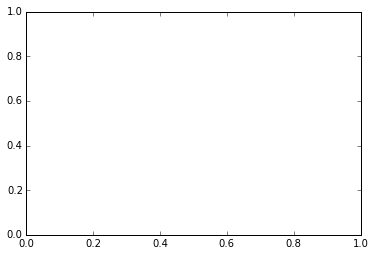

In [135]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

In [144]:
df_edible = df[df[0] == 0]    # 0: edible
df_poisonous = df[df[0] == 1] # 1: poisonous

In [140]:
fig.set_size_inches(15, 4)

In [142]:
ax

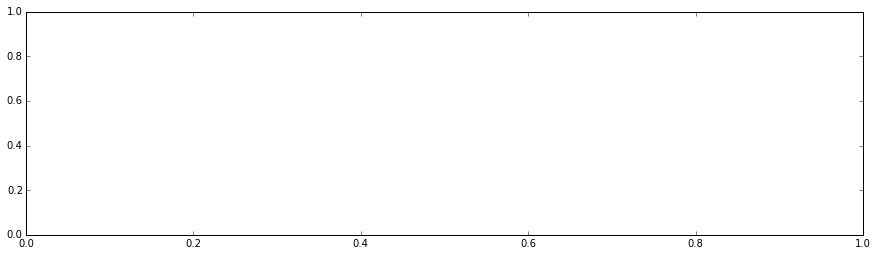

In [141]:
fig

In [147]:
df_edible.boxplot(ax=ax)

{'boxes': [<matplotlib.lines.Line2D at 0x7fcab983e390>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcab9830090>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcab97cd490>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcab983ee10>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcab983e650>,
  <matplotlib.lines.Line2D at 0x7fcab95c42d0>]}

In [148]:
plt.show()

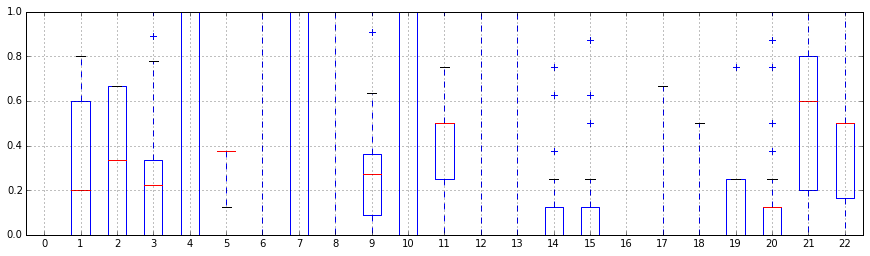

In [149]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_poisonous.boxplot(ax=ax)
plt.show()

In [150]:
map_dic[4]

{'f': 1, 't': 0}

In [151]:
df_edible[[0, 4]]

,0,4
0,0,0
3,0,0
8,0,0
13,0,0
17,0,0
18,0,0
19,0,0
21,0,0
25,0,0
31,0,0


In [3]:

import ssl

ssl._create_default_https_context = ssl._create_unverified_context

#ubuntu의 SSL에러를 잡기위해 추가한 코드

import urllib2
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
raw_csv = urllib2.urlopen(path)
feature_names = ('sepal length', 'sepal width', 'petal length', 'petal width')
all_names = feature_names + ('class',)
df = pd.read_csv(raw_csv, names=all_names)

In [4]:
iris_names = ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica')
df_group = df.groupby('class')['class']
print df_group.count()
#Iris_Setosa_Series = df_group.get_group('Iris-setosa')
#Iris_Versicolor_Series = df_group.get_group('Iris-versicolor')
#Iris_Virginica_Series = df_group.get_group('Iris-virginica')
Iris_Se_Sub_Df = df[df['class'] == iris_names[0]]
Iris_Ve_Sub_Df = df[df['class'] == iris_names[1]]
Iris_Vi_Sub_Df = df[df['class'] == iris_names[2]]
print
print Iris_Se_Sub_Df

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

    sepal length  sepal width  petal length  petal width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iri

In [5]:
import urllib2
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
raw_csv = urllib2.urlopen(path)
col_names = range(23)
df = pd.read_csv(raw_csv, names = col_names)

In [19]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [15]:
df.iloc[:, 0:20].head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e


In [11]:
df.iloc[:, 1:22].head()

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,x,s,n,t,p,f,c,n,k,e,...,s,s,w,w,p,w,o,p,k,s
1,x,s,y,t,a,f,c,b,k,e,...,s,s,w,w,p,w,o,p,n,n
2,b,s,w,t,l,f,c,b,n,e,...,s,s,w,w,p,w,o,p,n,n
3,x,y,w,t,p,f,c,n,n,e,...,s,s,w,w,p,w,o,p,k,s
4,x,s,g,f,n,f,w,b,k,t,...,s,s,w,w,p,w,o,e,n,a


In [21]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [22]:
df.iloc[:].head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [28]:
df.iloc[:,22]

0       u
1       g
2       m
3       u
4       g
5       g
6       m
7       m
8       g
9       m
10      g
11      m
12      g
13      u
14      g
15      u
16      g
17      g
18      u
19      u
20      m
21      g
22      m
23      m
24      m
25      g
26      m
27      m
28      u
29      d
       ..
8094    g
8095    d
8096    g
8097    l
8098    d
8099    g
8100    l
8101    p
8102    l
8103    l
8104    l
8105    l
8106    l
8107    l
8108    l
8109    g
8110    l
8111    g
8112    l
8113    d
8114    d
8115    l
8116    l
8117    d
8118    d
8119    l
8120    l
8121    l
8122    l
8123    l
Name: 22, dtype: object